In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import random
from random import shuffle

from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM
#from keras.layers.embeddings import Embedding


Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%pwd

'/content'

In [0]:
#df_train = pd.read_csv('./mitbih_train.csv')
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/mitbih_train.csv', header=None)
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/mitbih_test.csv', header=None)

In [5]:
df_train.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,0.198778,0.203550,0.208776,0.212885,0.218393,0.224966,0.231377,0.237123,0.242582,0.247923,0.253749,0.259748,0.266244,0.272734,0.279355,0.285588,0.291808,0.297672,0.303384,0.308795,0.313890,0.318454,0.322087,0.324891,0.326737,0.327817,0.327931,0.326746,0.324326,0.320537,...,0.030729,0.029582,0.028531,0.027573,0.026875,0.025771,0.024823,0.023932,0.023060,0.022458,0.021809,0.021245,0.020623,0.020026,0.019534,0.019053,0.018592,0.017664,0.016740,0.015722,0.014402,0.013024,0.011625,0.010262,0.008929,0.008056,0.007278,0.006531,0.005981,0.005479,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,0.171796,0.176496,0.180274,0.184101,0.186963,0.190002,0.193899,0.198465,0.202855,0.207166,0.211187,0.214821,0.218450,0.221486,0.224031,0.225848,0.227133,0.227830,0.228436,0.228871,0.228760,0.228393,0.227472,0.226180,0.224659,0.223110,0.221352,0.219258,0.216884,0.214168,...,0.116516,0.114463,0.112686,0.111103,0.110513,0.108566,0.106493,0.104591,0.102658,0.101395,0.100201,0.099386,0.098327,0.096635,0.095729,0.095368,0.095055,0.092902,0.091118,0.088574,0.084638,0.079949,0.075307,0.069892,0.063994,0.060074,0.056404,0.052840,0.050006,0.046693,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,0.070543,0.069182,0.068293,0.067744,0.070175,0.072993,0.074803,0.075972,0.076923,0.077872,0.079442,0.081911,0.085938,0.090032,0.094595,0.098901,0.103960,0.109348,0.114754,0.120730,0.127946,0.135962,0.144295,0.151852,0.157895,0.161035,0.161133,0.159383,0.157343,0.155388,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [6]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([72471.,  2223.,  5788.,   641.,  6431.]), array([0, 1, 2, 3, 4, 5]), <a list of 5 Patch objects>)


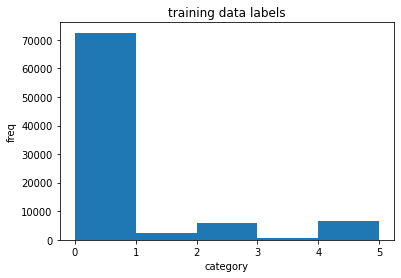

In [7]:
plt.figure(figsize=(6,4))
data_tr = plt.hist(df_train.iloc[:, -1],[0,1,2,3,4,5] )
plt.title('training data labels')
plt.ylabel('freq')
plt.xlabel('category')
print(data_tr)

In [8]:
set(df_train.iloc[:,-1])

{0.0, 1.0, 2.0, 3.0, 4.0}

In [9]:
df_test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
count,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,...,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000
mean,0.894410,0.761902,0.426627,0.221596,0.201676,0.209891,0.204805,0.200992,0.197634,0.196022,0.197905,0.202436,0.207303,0.211524,0.216840,0.223455,0.229845,0.235463,0.240701,0.245976,0.251751,0.257664,0.263788,0.270541,0.276921,0.283179,0.289342,0.295346,0.301180,0.306478,0.311708,0.316235,0.319868,0.322814,0.324713,0.325812,0.325856,0.324729,0.322518,0.319147,...,0.030044,0.028963,0.027824,0.026607,0.025425,0.024429,0.023681,0.022907,0.022260,0.021632,0.020902,0.020205,0.019503,0.019055,0.018643,0.018237,0.017482,0.016573,0.015762,0.014770,0.013538,0.012467,0.011263,0.010013,0.008845,0.007798,0.007057,0.006127,0.005744,0.005194,0.004588,0.004327,0.004020,0.003789,0.003638,0.003459,0.003166,0.003000,0.002946,0.473689
std,0.234560,0.218659,0.228572,0.208711,0.177727,0.172194,0.177946,0.176142,0.170228,0.166707,0.169880,0.174435,0.178156,0.182113,0.184688,0.187600,0.191432,0.195809,0.200435,0.204641,0.208835,0.212702,0.216295,0.219479,0.222084,0.224107,0.225231,0.226223,0.226847,0.227060,0.226925,0.226796,0.225430,0.223759,0.222196,0.220765,0.218938,0.217264,0.215056,0.212746,...,0.115209,0.113678,0.111878,0.110034,0.107466,0.105066,0.103549,0.102304,0.101056,0.099724,0.098239,0.096409,0.094837,0.093730,0.093932,0.093976,0.091960,0.089597,0.087863,0.085269,0.082142,0.079359,0.075340,0.070434,0.065435,0.060256,0.056703,0.051875,0.049754,0.046440,0.043128,0.042187,0.040255,0.039397,0.038535,0.037717,0.035903,0.035522,0.035266,1.143447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.924260,0.683366,0.251197,0.050505,0.082873,0.087912,0.072663,0.065997,0.064516,0.068493,0.070731,0.069104,0.068293,0.067699,0.069685,0.072285,0.074232,0.075167,0.076410,0.076923,0.078227,0.080584,0.083483,0.088026,0.092918,0.097378,0.102124,0.108246,0.113267,0.119519,0.126045,0.134274,0.142857,0.151260,0.157210,0.160407,0.160612,0.158299,0.156744,0.154839,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

(array([18118.,   556.,  1448.,   162.,  1608.]), array([0, 1, 2, 3, 4, 5]), <a list of 5 Patch objects>)


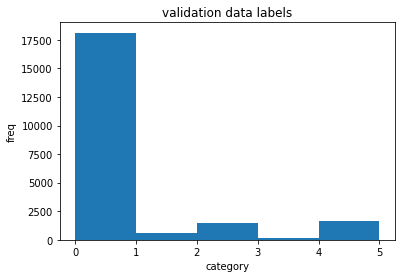

In [10]:
data_val = plt.hist(df_test.iloc[:, -1], [0,1,2,3,4,5])
plt.title('validation data labels')
plt.ylabel('freq')
plt.xlabel('category')
print(data_val)

## Data description

There are  87553 observations in the training set and 21891 observations in the test set.  All data is scaled between 0 and 1.  Each observation has 187 features.  The features are correspond to a human heart ECG signal sampled at 125hz.  Thus the data is time dependent.  

The labels are included in the last column.  Each label can take on a value between 0 and 4.  Zero meaning normal and 1 - 4 meaning abnormal.  More to be added about abnormal conditions.  We would like to classify these time dependent signals into each of the 5 classes.


Text(0, 0.5, 'scaled signal 0-1')

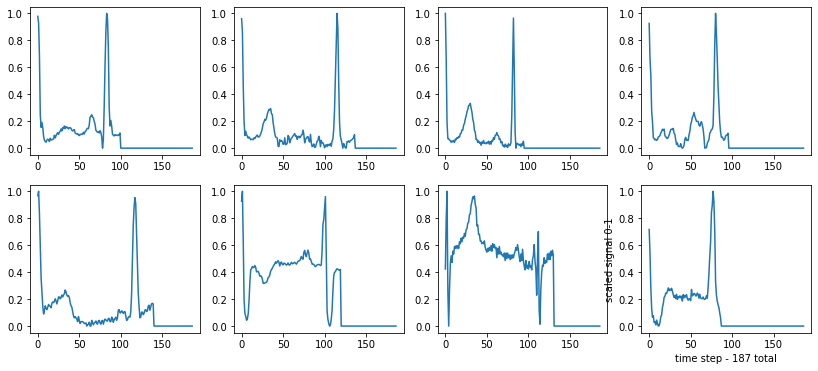

In [11]:
#sample data of ECG signal
plt.figure(figsize=(14,6))

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.plot(df_train.iloc[i,:-1])
plt.xlabel('time step - 187 total')
plt.ylabel('scaled signal 0-1')

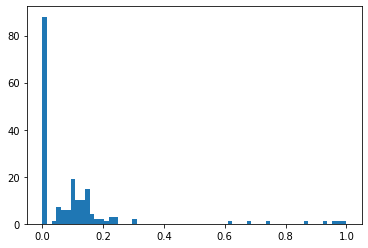

In [12]:
freq_list = plt.hist(df_train.iloc[0,:-1], 64)  #histogram of ECG signal broken down into 64 bins


In [13]:
freq_list[0]

array([88.,  0.,  1.,  7.,  6.,  6., 19., 10., 10., 15.,  4.,  2.,  2.,
        1.,  3.,  3.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.])

In [14]:
#create np arrays - make sure to shuffle data!!!
train = np.array(df_train)
val = np.array(df_test)
np.random.shuffle(train)
np.random.shuffle(val)
#training data
X = np.array(train[:, 0 :-1])  #the number of features should be 187
y = np.array(train[:, -1])      #get last col only, y label
#validation data
Xval = np.array(val[:, 0 :-1])
yval = np.array(val[:, -1])
print(X.shape)
print(y.shape)
print(Xval.shape)
print(yval.shape)

(87554, 187)
(87554,)
(21892, 187)
(21892,)


In [15]:
#one hot encode the y labels
from keras.utils import to_categorical

y_d = to_categorical(y)
yval_d = to_categorical(yval)
print(y_d.shape)
print(yval_d.shape)

(87554, 5)
(21892, 5)


In [16]:
y_d

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

Preprocessing: Digitize the input data for LSTM input requirement

In [0]:
#convert input data, X, into discrete bins, same as digitizing input data - not the same as hot encoding
num_bins = 64  #this would be similar to resolution of the data signal
bins = np.linspace(0,1, num_bins)

In [18]:
bins 

array([0.        , 0.01587302, 0.03174603, 0.04761905, 0.06349206,
       0.07936508, 0.0952381 , 0.11111111, 0.12698413, 0.14285714,
       0.15873016, 0.17460317, 0.19047619, 0.20634921, 0.22222222,
       0.23809524, 0.25396825, 0.26984127, 0.28571429, 0.3015873 ,
       0.31746032, 0.33333333, 0.34920635, 0.36507937, 0.38095238,
       0.3968254 , 0.41269841, 0.42857143, 0.44444444, 0.46031746,
       0.47619048, 0.49206349, 0.50793651, 0.52380952, 0.53968254,
       0.55555556, 0.57142857, 0.58730159, 0.6031746 , 0.61904762,
       0.63492063, 0.65079365, 0.66666667, 0.68253968, 0.6984127 ,
       0.71428571, 0.73015873, 0.74603175, 0.76190476, 0.77777778,
       0.79365079, 0.80952381, 0.82539683, 0.84126984, 0.85714286,
       0.87301587, 0.88888889, 0.9047619 , 0.92063492, 0.93650794,
       0.95238095, 0.96825397, 0.98412698, 1.        ])

In [19]:
X_d = np.digitize(X, bins=bins)  #X is now digitized 
Xval_d = np.digitize(Xval, bins=bins) #Xval is not digitized (not hot encoded)
X_d[0]  #for example

array([ 1,  5, 11, 19, 26, 29, 33, 36, 40, 45, 49, 51, 52, 53, 54, 55, 57,
       57, 59, 59, 60, 61, 61, 61, 61, 60, 60, 58, 57, 54, 53, 51, 50, 49,
       48, 47, 46, 46, 45, 45, 45, 45, 45, 44, 45, 44, 44, 43, 44, 43, 44,
       43, 43, 43, 43, 43, 43, 43, 43, 43, 44, 43, 44, 44, 44, 43, 43, 42,
       43, 41, 42, 42, 43, 42, 42, 41, 42, 42, 42, 42, 42, 41, 42, 47, 53,
       58, 64, 59, 49, 38, 37, 39, 40, 39, 39, 39, 40, 40, 41, 40,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Text(0.5, 1.0, 'digitized ECG signal 0-64 bins')

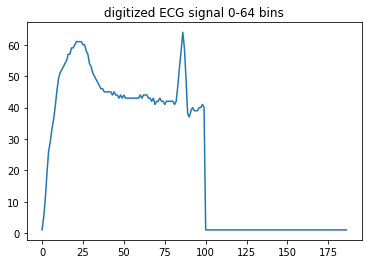

In [20]:
plt.plot(X_d[0])
plt.title('digitized ECG signal 0-64 bins')

Here is digitized plot - it doesn't look too bad.  We could increase the number of bins for more resolution.

In [0]:
#this model w/ embedding layer not being used - do not run

output_dim = 32  #embedding length - hyper parameter
#input_dim is the vocab size; input_dim = num_bins
#input_length is the number of features for an observation (same as document length); fixed at 187 in this study

model = Sequential()
model.add(Embedding(input_dim = num_bins+1, output_dim=output_dim, input_length=187))
model.add(LSTM(units=32, activation='tanh', input_shape = (num_bins, output_dim) ))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

#model.fit(X_d, y_d, epochs=10, verbose=True, validation_data= (Xval_d, yval_d) )
model.fit(X_d, y_d, epochs=10)

Note: the input data has to be reshaped for LSTM

In [0]:
#reshape data for LSTM input
X_dr = X_d.reshape(X_d.shape[0], X_d.shape[1], 1)
Xval_dr = Xval_d.reshape(Xval_d.shape[0], Xval_d.shape[1], 1)
#y_dr = y_d.reshape(y_d.shape[0], ...)


In [22]:
#confirm reshape worked
print(X_dr.shape)
print(Xval_dr.shape)

(87554, 187, 1)
(21892, 187, 1)


Build baseline LSTM model

In [0]:
def buildmodel():   #no embedding layer, uses only one dense layer
    
    #input_dim is the vocab size; input_dim = num_bins
    #input_length is the number of features for an observation (same as document length); fixed at 187 in this study
    input_length = 187
    model = Sequential()
    model.add(LSTM(units=32, activation='tanh', input_shape = (input_length, 1) ))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    model.summary()
    return model
    

In [0]:
#build model1
#model1 = buildmodel()
#model1.fit(X_dr, y_d, epochs= 15, batch_size = 128, verbose=1)

In [0]:
#model1 already saved
#model1.save("./drive/My Drive/Colab Notebooks/csci4622ml/model1.h5")

In [29]:
from keras.models import load_model
model1 = load_model("./drive/My Drive/Colab Notebooks/csci4622ml/finalproj/model1.h5")
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 4,517
Trainable params: 4,517
Non-trainable params: 0
_________________________________________________________________


In [0]:
#function to report metrics
from sklearn.metrics import confusion_matrix, classification_report
def computeMetrics(name, Xval_dr, yval_d, yval, api =False): 
                   #name is your trained model; 
                   #Xval_dr must be in 3d matrix form; make sure you use VALIDATION DATA
                   #api=False is whether or not model api was used or generic sequential model was used
    Xv=Xval_dr
    loss, acc = name.evaluate(Xv, yval_d)               
    print(name, ': val loss = %.4f' %loss, 'val acc = %.4f' %acc )
    if api == True:
        p=name.predict(Xv)
        yhat = [np.argmax(i) for i in p]
    else:    
        yhat = name.predict_classes(Xv)
    print(confusion_matrix(yval, yhat))
    print(classification_report(yval, yhat, labels=[0,1,2,3,4]))


In [32]:
#report these results - model1
computeMetrics(model1, Xval_dr, yval_d, yval)

21892/21892 [==============================] - 11s 501us/step
<keras.engine.sequential.Sequential object at 0x7f6247417780> : val loss = 0.1827 val acc = 0.9480
[[17921    35    76    16    70]
 [  404   138    14     0     0]
 [  201     2  1171    33    41]
 [   56     0    25    81     0]
 [  116     0    48     1  1443]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18118
           1       0.79      0.25      0.38       556
           2       0.88      0.81      0.84      1448
           3       0.62      0.50      0.55       162
           4       0.93      0.90      0.91      1608

    accuracy                           0.95     21892
   macro avg       0.83      0.69      0.73     21892
weighted avg       0.94      0.95      0.94     21892



In [0]:
def buildmodel2():   #model2 adds another dense hidden layer w relu activation - do not report these results, not as good as model1-baseline
    
    #input_dim is the vocab size; input_dim = num_bins
    #input_length is the number of features for an observation (same as document length); fixed at 187 in this study
    input_length = 187
    model = Sequential()
    model.add(LSTM(units=32, activation='tanh', input_shape = (input_length, 1) ))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    model.summary()
    return model

In [0]:
#model2 = buildmodel2()
#model2.fit(X_dr, y_d, epochs= 20, batch_size = 128, verbose=1)

In [0]:
#model2 already saved
#model2.save("./drive/My Drive/Colab Notebooks/csci4622ml/model2.h5")

In [35]:
from keras.models import load_model
model2 = load_model("./drive/My Drive/Colab Notebooks/csci4622ml/finalproj/model2.h5")
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 85        
Total params: 4,965
Trainable params: 4,965
Non-trainable params: 0
_________________________________________________________________


In [36]:
computeMetrics(model2, Xval_dr, yval_d, yval)  #recall is bad, do not report model2

21892/21892 [==============================] - 11s 501us/step
<keras.engine.sequential.Sequential object at 0x7f623f35fa90> : val loss = 0.2136 val acc = 0.9408
[[18015    35    50     1    17]
 [  367   179    10     0     0]
 [  348     4  1043    12    41]
 [  156     0     4     2     0]
 [  227     0    24     0  1357]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     18118
           1       0.82      0.32      0.46       556
           2       0.92      0.72      0.81      1448
           3       0.13      0.01      0.02       162
           4       0.96      0.84      0.90      1608

    accuracy                           0.94     21892
   macro avg       0.76      0.58      0.63     21892
weighted avg       0.93      0.94      0.93     21892



Two stage LSTM RNN model

In [0]:
#testing model and weight save
from keras.models import model_from_json

model1_json = model1.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model1_json)
model1.save_weights("model1_w.h5")    

In [0]:
#testing
from keras.models import Model
model1_test = buildmodel()
model1_test.load_weights('model1_w.h5')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 4,517
Trainable params: 4,517
Non-trainable params: 0
_________________________________________________________________


In [0]:
#testing - results replicated by recalling weights of model1
computeMetrics(model1_test, Xval_dr, yval_d, yval)

21892/21892 [==============================] - 17s 792us/step
<keras.engine.sequential.Sequential object at 0x7fe4663e8e48> : val loss = 0.1827 val acc = 0.9480
[[17921    35    76    16    70]
 [  404   138    14     0     0]
 [  201     2  1171    33    41]
 [   56     0    25    81     0]
 [  116     0    48     1  1443]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18118
           1       0.79      0.25      0.38       556
           2       0.88      0.81      0.84      1448
           3       0.62      0.50      0.55       162
           4       0.93      0.90      0.91      1608

    accuracy                           0.95     21892
   macro avg       0.83      0.69      0.73     21892
weighted avg       0.94      0.95      0.94     21892



In [0]:
#model2.save_weights("model2_w.h5")  

Create first stage - normal/not normal

In [43]:
#use Model API to create stage one classifier: normal / not normal
from keras.models import Model
from keras.layers import Input
inputs = Input((187,1))
lstm = LSTM(units=32, activation='tanh', trainable=True)(inputs)
dense1 = Dense(units=16, activation='relu', trainable=True)(lstm)
outputs = Dense(units=2, activation='softmax')(dense1)
model2_a = Model(inputs=inputs, outputs=outputs)
model2_a.summary()
model2_a.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 187, 1)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 34        
Total params: 4,914
Trainable params: 4,914
Non-trainable params: 0
_________________________________________________________________


In [0]:
#one hot encode the y labels for part A classifier: 0, 1
from keras.utils import to_categorical

y_2classes = [int(i) if i==0 else 1 for i in y]
y_2classes_hot = to_categorical(y_2classes) 
yval_2classes = [int(k) if k==0 else 1 for k in yval]
yval_2classes_hot = to_categorical(yval_2classes)

In [41]:
y_2classes_hot.shape  #train labels

(87554, 2)

In [45]:
yval_2classes_hot.shape  #validation labels

(21892, 2)

Fit model - 1st stage and save weights

In [0]:
#stage 1 classifier - model2_a
model2_a.fit(X_dr, y_2classes_hot, epochs = 5, batch_size=128, validation_data = (Xval_dr, yval_2classes_hot) )  #fit wrt 2 class hot data

In [0]:
model2_a.save("./drive/My Drive/Colab Notebooks/csci4622ml/finalproj/model2_a.h5")
model2_a.save_weights("./drive/My Drive/Colab Notebooks/csci4622ml/finalproj/model2a_w.h5")

In [46]:
from keras.models import load_model
model2_a = load_model("./drive/My Drive/Colab Notebooks/csci4622ml/finalproj/model2_a.h5")
model2_a.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 187, 1)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 4,914
Trainable params: 4,914
Non-trainable params: 0
_________________________________________________________________


Create duplicate of model2_a and then modify it to attach to the 2nd stage, call it model2_aa, load weights, strip off last layer

In [47]:
#create duplicate of model2_a and then modify for the first stage, call it model2_aa
inputs = Input((187,1))
lstm = LSTM(units=32, activation='tanh', trainable=False)(inputs)  #make sure to freeze layer
dense1 = Dense(units=16, activation='relu', trainable=False)(lstm)  #make sure to freeze layer
outputs = Dense(units=2, activation='softmax')(dense1)
model2_aa = Model(inputs=inputs, outputs=outputs)  #model2_aa created here
model2_aa.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model2_aa.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 187, 1)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 34        
Total params: 4,914
Trainable params: 34
Non-trainable params: 4,880
_________________________________________________________________


In [0]:
model2_aa.load_weights("./drive/My Drive/Colab Notebooks/csci4622ml/finalproj/model2a_w.h5")  #load wts from the trained model


In [49]:
#confirm wts loaded correctly, are results still the same?  loss=0.1525 yes
loss, acc = model2_aa.evaluate(Xval_dr, yval_2classes_hot)
print('val loss = %.4f' %loss, 'val acc = %.4f' %acc )


21892/21892 [==============================] - 12s 527us/step
val loss = 0.1525 val acc = 0.9540


In [50]:
#pop the last layer of the model2_aa so that it will be connected to 2nd classifier 
model2_aa.layers.pop()
model2_aa.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 187, 1)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
Total params: 4,914
Trainable params: 34
Non-trainable params: 4,880
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
#important!!! seems like you need to create another set of layers from fresh then load the weights
#from precursor model and not just re-use the precursor model w the last layer popped
m2a = Model(inputs=inputs, outputs=dense1)
m2a.set_weights(model2_aa.get_weights())
#m2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Create 2nd stage classifier (labels 0-4) and attach to it the first classifier; new model called m2

In [52]:
#create the 2nd stage classifier 
i = Input((187,1))
#l1 = model2_aa(i)
l1 = m2a(i)
l2 = Dense(units=16, activation='relu')(l1)
o = Dense(units=5, activation='softmax')(l2)
m2 = Model(inputs = i, outputs = o)
m2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
m2.summary()
#now the summary looks correct; note non-trainable means weight should be frozen
#the model should run somewhat quicker if weights did get loaded correctly

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 187, 1)            0         
_________________________________________________________________
model_6 (Model)              (None, 16)                4880      
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 85        
Total params: 5,237
Trainable params: 357
Non-trainable params: 4,880
_________________________________________________________________


Run with default learning rate Adam

In [53]:
m2.fit(X_dr, y_d, epochs= 5, batch_size=128, validation_data = (Xval_dr, yval_d), verbose=1)

Train on 87554 samples, validate on 21892 samples
Epoch 1/5
87554/87554 [==============================] - 29s 335us/step - loss: 0.5626 - accuracy: 0.8176 - val_loss: 0.2827 - val_accuracy: 0.9167
Epoch 2/5
87554/87554 [==============================] - 38s 438us/step - loss: 0.2763 - accuracy: 0.9152 - val_loss: 0.2762 - val_accuracy: 0.9173
Epoch 3/5
87554/87554 [==============================] - 39s 440us/step - loss: 0.2712 - accuracy: 0.9165 - val_loss: 0.2724 - val_accuracy: 0.9185
Epoch 4/5
87554/87554 [==============================] - 39s 444us/step - loss: 0.2679 - accuracy: 0.9172 - val_loss: 0.2699 - val_accuracy: 0.9200
Epoch 5/5
87554/87554 [==============================] - 37s 424us/step - loss: 0.2658 - accuracy: 0.9187 - val_loss: 0.2684 - val_accuracy: 0.9209


In [54]:
computeMetrics(m2, Xval_dr, yval_d, yval, api=True)

21892/21892 [==============================] - 12s 529us/step
<keras.engine.training.Model object at 0x7f623eae3eb8> : val loss = 0.2684 val acc = 0.9209
[[18016    12    44    15    31]
 [  444    46    55     8     3]
 [  298    12   630    18   490]
 [   82     0    16    58     6]
 [  117     0    79     2  1410]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     18118
           1       0.66      0.08      0.15       556
           2       0.76      0.44      0.55      1448
           3       0.57      0.36      0.44       162
           4       0.73      0.88      0.79      1608

    accuracy                           0.92     21892
   macro avg       0.73      0.55      0.58     21892
weighted avg       0.91      0.92      0.91     21892



Learning rate optimization 

In [0]:
#learning rate optimization 
def buildmodel_m2():
    i = Input((187,1))
    #l1 = model2_aa(i)
    l1 = m2a(i)
    l2 = Dense(units=32, activation='relu')(l1)
    #l2 = BatchNormalization()(l2)
    l2 = Dense(units=16, activation='relu')(l2)
    o = Dense(units=5, activation='softmax')(l2)
    m2_2 = Model(inputs = i, outputs = o)
    return m2_2


In [0]:
m2_2 = buildmodel_m2()
m2_2.summary()
learn = [0.00005, .0001, 0.001, 0.01 ]
hist = {}

for i in learn:
    m2_2 = buildmodel_m2()
    opt = Adam(learning_rate=i, beta_1=0.9, beta_2=0.999, amsgrad=False)
    m2_2.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    data = m2_2.fit(X_dr, y_d, epochs= 10, batch_size=128, validation_data = (Xval_dr, yval_d), verbose=1)
    hist[i] = data.history['val_loss']
    
    


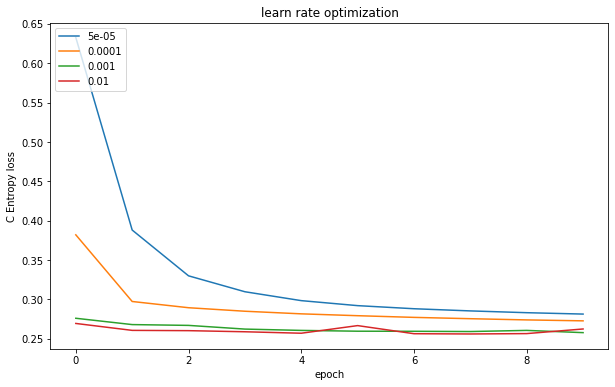

In [0]:
plt.figure(figsize=(10,6))
plt.xlabel('epoch')
plt.ylabel('C Entropy loss')
plt.title('learn rate optimization')

for i in learn:
    plt.plot(hist[i], label=i)

plt.legend(loc='upper left')
plt.savefig('./drive/My Drive/SGD_lrates2.png')


In [0]:
m2.save("./drive/My Drive/Colab Notebooks/csci4622ml/finalproj/m2.h5")
m2_2.save("./drive/My Drive/Colab Notebooks/csci4622ml/finalproj/m2_2.h5")

In [0]:
from keras.models import load_model
m2_2 = load_model("./drive/My Drive/Colab Notebooks/csci4622ml/finalproj/m2_2.h5")
#model.summary()

In [56]:
computeMetrics(m2_2, Xval_dr, yval_d, yval, api=True)

21892/21892 [==============================] - 11s 504us/step
<keras.engine.training.Model object at 0x7f623e8d37f0> : val loss = 0.2548 val acc = 0.9258
[[17998    22    50    23    25]
 [  422    99    18    15     2]
 [  267    17   698    27   439]
 [   71     2    23    65     1]
 [  109     2    86     3  1408]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     18118
           1       0.70      0.18      0.28       556
           2       0.80      0.48      0.60      1448
           3       0.49      0.40      0.44       162
           4       0.75      0.88      0.81      1608

    accuracy                           0.93     21892
   macro avg       0.74      0.59      0.62     21892
weighted avg       0.92      0.93      0.92     21892

